# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [4]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: ylabel='Frequency'>

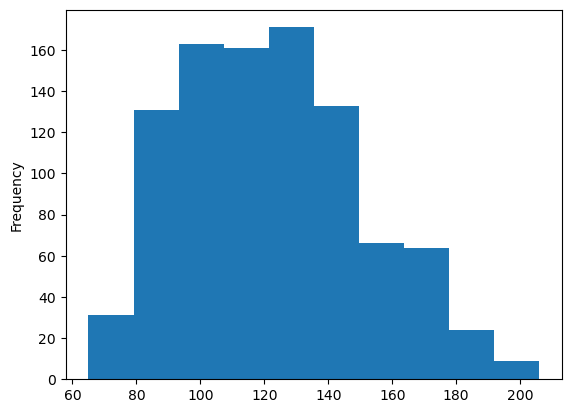

In [2]:
df['bpm'].plot(kind='hist')

<Axes: xlabel='key'>

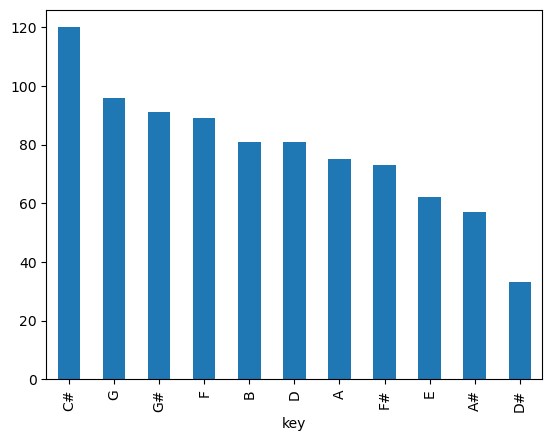

In [8]:
df['key'].value_counts().plot(kind='bar')

<Axes: xlabel='mode'>

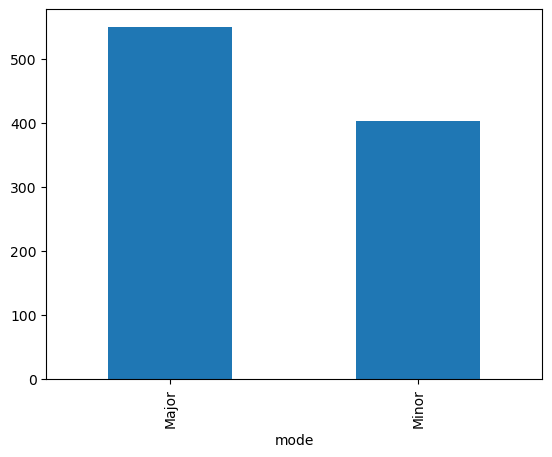

In [10]:
df['mode'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

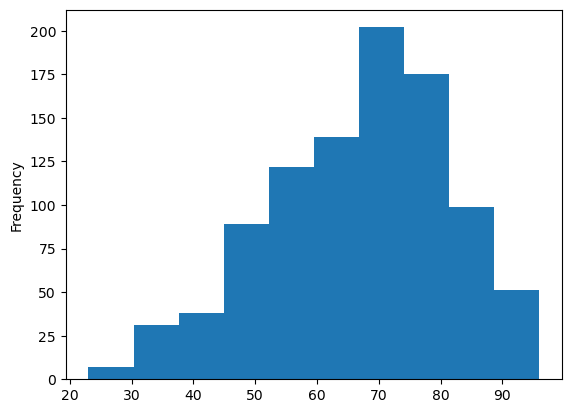

In [11]:
df['danceability_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

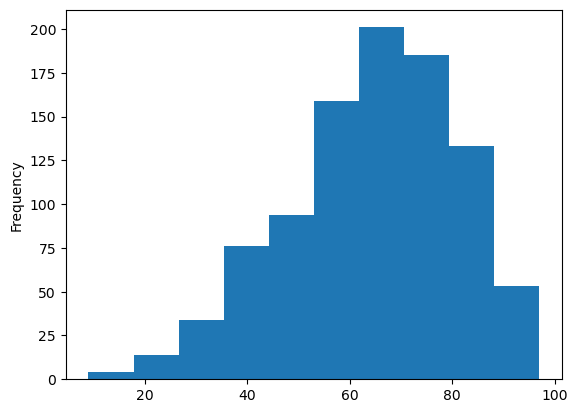

In [12]:
df['energy_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

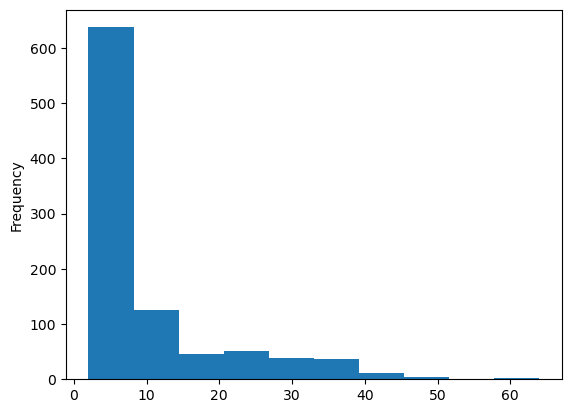

In [13]:
df['speechiness_%'].plot(kind='hist')

In [15]:
df['speechiness_%'].describe()

count    953.000000
mean      10.131165
std        9.912888
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       64.000000
Name: speechiness_%, dtype: float64

<Axes: ylabel='Frequency'>

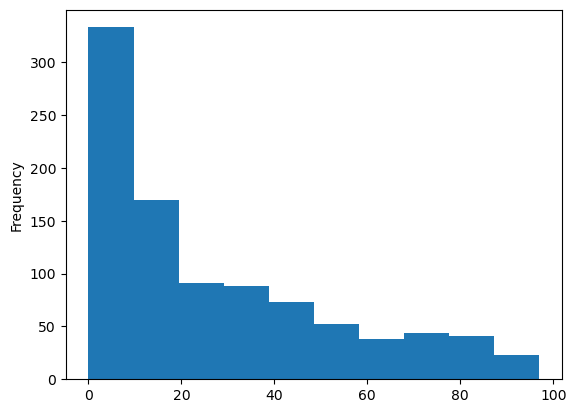

In [14]:
df['acousticness_%'].plot(kind='hist')

In [17]:
df[['bpm', 'key', 'mode', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']].describe()

,bpm,danceability_%,energy_%,speechiness_%,acousticness_%
count,953.000000,953.00000,953.000000,953.000000,953.000000
mean,122.540399,66.96957,64.279119,10.131165,27.057712
std,28.057802,14.63061,16.550526,9.912888,25.996077
min,65.000000,23.00000,9.000000,2.000000,0.000000
25%,100.000000,57.00000,53.000000,4.000000,6.000000
50%,121.000000,69.00000,66.000000,6.000000,18.000000
75%,140.000000,78.00000,77.000000,11.000000,43.000000
max,206.000000,96.00000,97.000000,64.000000,97.000000


BPM: The most common tempo range for songs is between 130–140 BPM, indicating that faster, upbeat rhythms are highly popular among listeners.

Key: The C# key appears most frequently in popular songs, suggesting it’s a preferred tonal center for mainstream hits.

Mode: The Major mode dominates the dataset.

Energy: The range of 0.65–0.70 characterizes energetic songs.

Speechiness: With values primarily between 0–0.1, most songs contain little spoken content and are more melodic or instrumental rather than lyrical or rap-heavy.

Acousticness: Songs typically range from 0–0.1, showing that most hits rely on electronic production rather than acoustic instrumentation.

In [27]:

filtered_df = df.loc[(df['bpm'] >= 120) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head(20)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
194,Shut up My Moms Calling,Hotel Ugly,1,2020,2,10,1788,14,405136812,1,...,139,A,Minor,48,37,41,32,0,10,10
213,FLOWER,JISOO,1,2023,3,31,839,18,232896922,20,...,124,A,Minor,84,64,39,3,0,11,4
214,All The Way Live (Spider-Man: Across the Spide...,"Future, Lil Uzi Vert, Metro Boomin",3,2023,6,2,259,0,37126685,5,...,135,A,Minor,77,28,55,18,0,22,15
220,Las Morras,"BLESSD, Peso Pluma",2,2023,4,4,291,8,127026613,8,...,133,A,Minor,78,90,84,31,0,7,4
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",2,2017,6,2,27705,10,1897517891,537,...,124,A,Minor,79,59,86,4,0,8,11
502,Is There Someone Else?,The Weeknd,1,2022,1,7,2881,6,391251368,13,...,135,A,Minor,70,60,58,4,0,16,3


In [26]:
hit_songs = df.loc[
    df['bpm'].between(130,140) &
    (df['key'] == 'C#') &
    (df['mode'] == 'Major') &
    df['danceability_%'].between(60,80) &
    df['energy_%'].between(60,80) &
    (df['speechiness_%'] <= 15) &
    (df['acousticness_%'] <= 20)
]

cols = ['track_name','artist(s)_name','bpm','key','mode',
        'danceability_%','energy_%','speechiness_%','acousticness_%','streams']
hit_songs[cols].head(20)



,track_name,artist(s)_name,bpm,key,mode,danceability_%,energy_%,speechiness_%,acousticness_%,streams
600,I WANNA BE YOUR SLAVE,Mï¿½ï¿½ne,133,C#,Major,75,61,4,0,851070493


### Guaranteed Smash Hit Formula

| Feature | Ideal Range / Value | Reason |
|----------|----------------------|--------|
| **BPM** | 130 – 140 | Upbeat tempos dominate popular songs |
| **Key** | C# | Most frequent key in dataset |
| **Mode** | Major | Uplifting, bright tonality preferred |
| **Danceability %** | 0.65 – 0.75 | Strong rhythm and groove without monotony |
| **Energy %** | 0.65 – 0.70 | Balanced intensity typical for hits |
| **Speechiness %** | 0 – 0.10 | More sung than spoken content |
| **Acousticness %** | 0 – 0.10 | Primarily electronic production |

In [28]:
song = df.loc[df['track_name'].str.contains('One Kiss', case=False, na=False)]
song[['track_name', 'artist(s)_name', 'bpm', 'key', 'mode', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']]


,track_name,artist(s)_name,bpm,key,mode,danceability_%,energy_%,speechiness_%,acousticness_%
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",124,A,Minor,79,86,11,4


The song’s BPM is 124, which is close to the ideal hit range of 120–140 BPM. It’s written in A Minor, a relative key of C Major, though different from the more common C# Major. With 79% danceability and 11% speechniness, it fits the energetic, electronic trend of popular hits. However, its 86% energy and slightly higher acusticness (4%) make it more intense and club-oriented than the typical hit formula.